In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
fr = pd.DataFrame()

flights_to_add = ['N211LB', 'N226LB', 'N235LB', 'N238LB', 'N252LB', 'N271LB', 'N329LB', 'N789LB']

min_pts_list = ['1416']

for loon in flights_to_add:
    
    for mp in min_pts_list:

        aux = pd.read_csv('../../../../og_data/DBSCAN/' + 'eps2.5/' +  loon \
                          + '/CL-' + loon 
                          + '-mp_'+ str(mp) +  '.csv', \
                          parse_dates=['ts'], low_memory=False)

        aux['eps'] = 0.00039
        aux['min_pts'] = mp


        fr = fr.append(aux)
    


In [71]:
bl = fr

In [73]:
bl['stationary'] = bl['cluster'].apply(lambda x: True if x != -1 else False)

In [82]:

def compute_service_time(t, prev_t, cl, prev_cl, air, prev_air):
    
    # Compute the time since last record if it is from the same cluster 
    # Also same aircraft_id to avoid counting non-flight time
    if((cl == prev_cl) & (air == prev_air)):
        
        return t - prev_t
    
    else:
        return pd.Timedelta(seconds=0)
    
    
service_times_df = pd.DataFrame()

for loon in flights_to_add:
    
    loon_info = bl.loc[bl.registration_id == loon]
    loon_info = loon_info.sort_values('ts')

    
    loon_info['prev_ts'] = loon_info['ts'].shift(1)
    loon_info['prev_ts'] = loon_info['prev_ts'].fillna(0)
    
    loon_info['prev_cluster'] = loon_info['cluster'].shift(1)
    
    loon_info['prev_air'] = loon_info['aircraft_id'].shift(1)
    
    
    loon_info['time_since_last_record'] = loon_info.apply(lambda x: compute_service_time(x.ts, x.prev_ts, \
                                                          x.cluster, x.prev_cluster, x.aircraft_id, x.prev_air),\
                                                          axis=1)
   

    aux = loon_info.groupby(['registration_id', 'cluster'])['time_since_last_record'].sum().reset_index()
    
    service_times_df = service_times_df.append(aux)
    
    

In [83]:
service_times_df['stationary'] = service_times_df['cluster'].apply(lambda x: True if x != -1 else False)
service_times_df['duration'] = service_times_df['time_since_last_record']/ np.timedelta64(1, 'm')
service_times_df

,registration_id,cluster,time_since_last_record,stationary,duration
0,N211LB,-1,53 days 11:59:41,False,77039.683333
1,N211LB,0,2 days 07:54:51,True,3354.850000
2,N211LB,1,1 days 23:25:27,True,2845.450000
3,N211LB,2,1 days 03:44:49,True,1664.816667
0,N226LB,-1,131 days 00:05:30,False,188645.500000
1,N226LB,0,2 days 21:12:49,True,4152.816667
2,N226LB,1,2 days 00:51:02,True,2931.033333
3,N226LB,2,12 days 13:10:03,True,18070.050000
4,N226LB,3,0 days 14:14:25,True,854.416667
5,N226LB,4,1 days 11:43:38,True,2143.633333


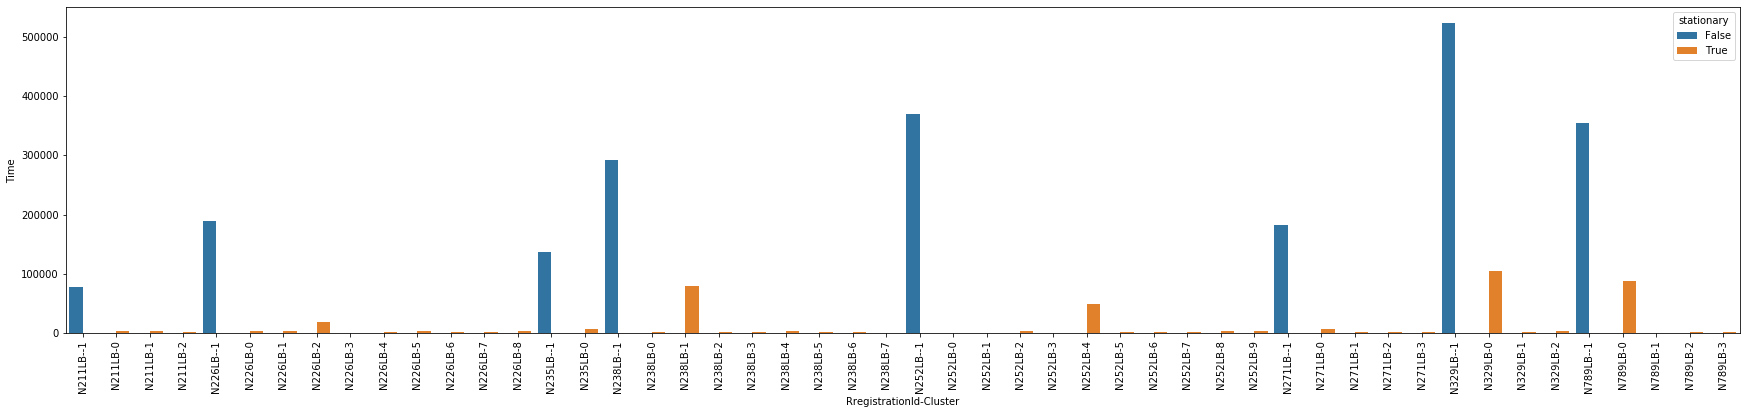

In [90]:
service_times_df['id_clus'] = service_times_df['registration_id'].str.cat(service_times_df['cluster'].astype(str), sep='-')

plt.figure(loon, figsize=(30,6))

ax = sns.barplot(x=service_times_df['id_clus'], y='duration', hue='stationary', \
                    data=service_times_df)

dummy = ax.set_ylabel('Time')
dummy = ax.set_xlabel('RregistrationId-Cluster')
dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dummy = ax.tick_params(labelsize=10)




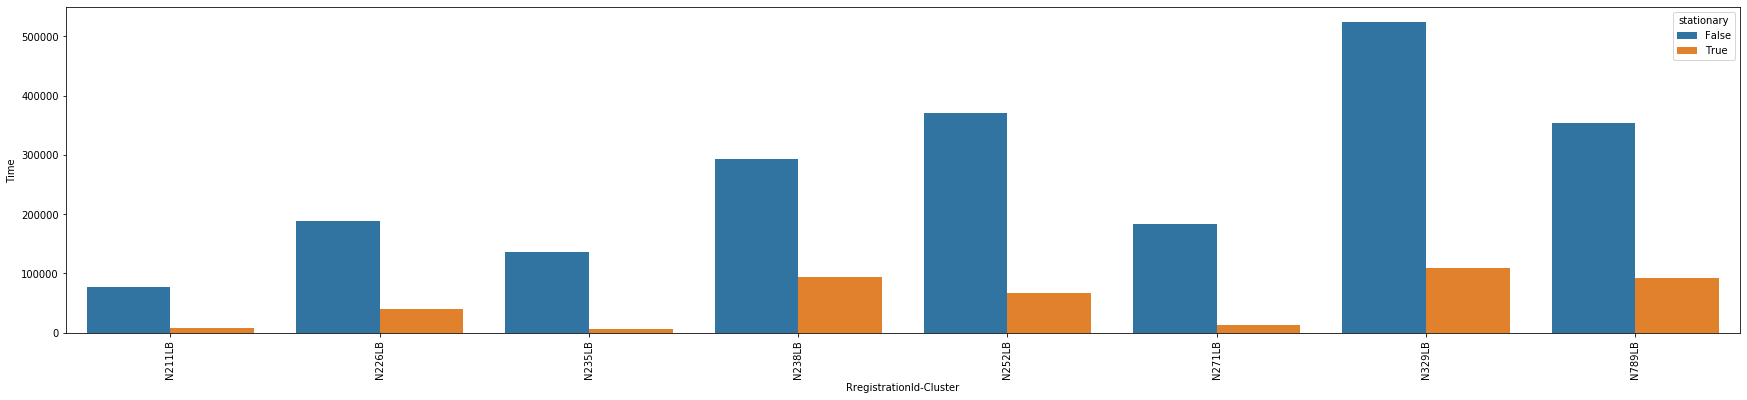

In [97]:

aux = service_times_df.groupby(['registration_id', 'stationary'])['duration'].sum().reset_index()

plt.figure(loon, figsize=(30,6))

ax = sns.barplot(x=aux['registration_id'], y='duration', hue='stationary', \
                    data=aux)

dummy = ax.set_ylabel('Time')
dummy = ax.set_xlabel('RregistrationId-Cluster')
dummy = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
dummy = ax.tick_params(labelsize=10)